<a href="https://colab.research.google.com/github/deksa89/deksa89/blob/main/Predict_Stock_Prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Upload the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
#Store the data into data frame
df = pd.read_csv('TSLA.csv')

#Set date to be index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-08-28,2020-08-28,459.023987,463.697998,437.303986,442.679993,442.679993,100406000
2020-08-31,2020-08-31,444.609985,500.140015,440.109985,498.320007,498.320007,118374400
2020-09-01,2020-09-01,502.140015,502.489990,470.510010,475.049988,475.049988,89841100
2020-09-02,2020-09-02,478.989990,479.040009,405.119995,447.369995,447.369995,96176100
2020-09-03,2020-09-03,407.230011,431.799988,402.000000,407.000000,407.000000,87596100
...,...,...,...,...,...,...,...
2021-08-23,2021-08-23,685.440002,712.130005,680.750000,706.299988,706.299988,20264900
2021-08-24,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2021-08-25,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2021-08-26,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300


In [4]:
#Get the number of trading days
df.shape

(252, 7)

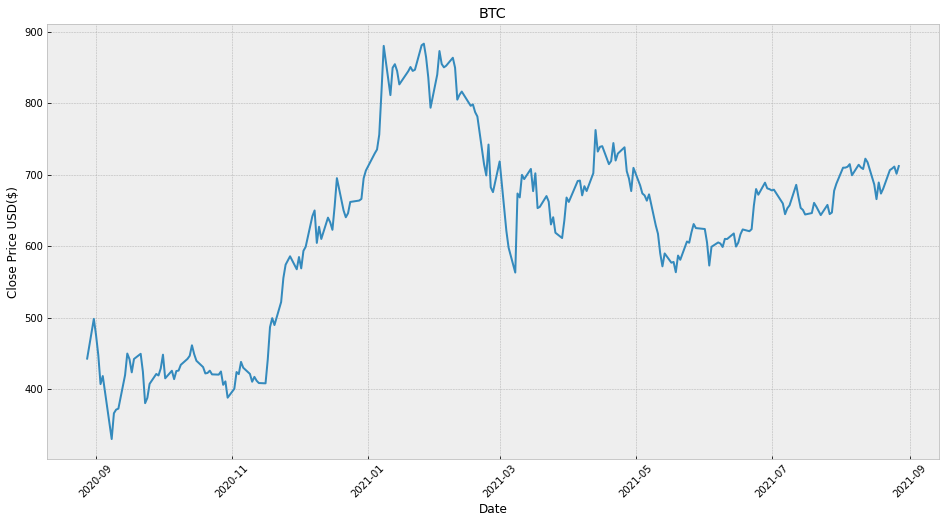

In [5]:
#Show Close Price on as a graph
plt.figure(figsize=(16, 8))
plt.title("BTC")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Close Price USD($)")
plt.plot(df["Close"])
plt.show()


In [6]:
 #Print close price
df = df[['Close']]
df.head(4)

,Close
2020-08-28,442.679993
2020-08-31,498.320007
2020-09-01,475.049988
2020-09-02,447.369995


In [7]:
#Create a variable to predict "X" days in the future
future_days = 25

#Create a new column (target) shifted "X" units/days up
df["Prediction"]= df[["Close"]].shift(-future_days)

df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
2021-08-24,708.489990,NaN
2021-08-25,711.200012,NaN
2021-08-26,701.159973,NaN
2021-08-27,711.919983,NaN


In [8]:
#Create a feature data set (X) and convert it to numpy array and remove the last "X" rows/days
X = np.array(df.drop(["Prediction"], 1))[:-future_days]
print(X)

[[442.679993]
 [498.320007]
 [475.049988]
 [447.369995]
 [407.      ]
 [418.320007]
 [330.209991]
 [366.279999]
 [371.339996]
 [372.720001]
 [419.619995]
 [449.76001 ]
 [441.76001 ]
 [423.429993]
 [442.149994]
 [449.390015]
 [424.230011]
 [380.359985]
 [387.790009]
 [407.339996]
 [421.200012]
 [419.070007]
 [429.01001 ]
 [448.160004]
 [415.089996]
 [425.679993]
 [413.980011]
 [425.299988]
 [425.920013]
 [434.      ]
 [442.299988]
 [446.649994]
 [461.299988]
 [448.880005]
 [439.670013]
 [430.829987]
 [421.940002]
 [422.640015]
 [425.790009]
 [420.630005]
 [420.279999]
 [424.679993]
 [406.019989]
 [410.829987]
 [388.040009]
 [400.51001 ]
 [423.899994]
 [420.980011]
 [438.089996]
 [429.950012]
 [421.26001 ]
 [410.359985]
 [417.130005]
 [411.76001 ]
 [408.5     ]
 [408.089996]
 [441.609985]
 [486.640015]
 [499.269989]
 [489.609985]
 [521.849976]
 [555.380005]
 [574.      ]
 [585.76001 ]
 [567.599976]
 [584.76001 ]
 [568.820007]
 [593.380005]
 [599.039978]
 [641.76001 ]
 [649.880005]
 [604.

In [9]:
#Create the target data set (Y) and convert it to a numpy array and get all of the target values except the last "X" days/rows
Y = np.array(df["Prediction"])[:-future_days]
print(Y)

[425.679993 413.980011 425.299988 425.920013 434.       442.299988
 446.649994 461.299988 448.880005 439.670013 430.829987 421.940002
 422.640015 425.790009 420.630005 420.279999 424.679993 406.019989
 410.829987 388.040009 400.51001  423.899994 420.980011 438.089996
 429.950012 421.26001  410.359985 417.130005 411.76001  408.5
 408.089996 441.609985 486.640015 499.269989 489.609985 521.849976
 555.380005 574.       585.76001  567.599976 584.76001  568.820007
 593.380005 599.039978 641.76001  649.880005 604.47998  627.070007
 609.98999  639.830017 633.25     622.77002  655.900024 695.
 649.859985 640.340027 645.97998  661.77002  663.690002 665.98999
 694.780029 705.669983 729.77002  735.109985 755.97998  816.039978
 880.02002  811.190002 849.440002 854.409973 845.       826.159973
 844.549988 850.450012 844.98999  846.640015 880.799988 883.090027
 864.159973 835.429993 793.530029 839.809998 872.789978 854.690002
 849.98999  852.22998  863.419983 849.460022 804.820007 811.659973
 816.11

In [10]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linera regression model
lr = LinearRegression().fit(x_test, y_test)

In [12]:
#Get the last "X" rows of the feature data set
x_future = df.drop(["Prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[623.309998],
       [620.830017],
       [623.710022],
       [656.570007],
       [679.820007],
       [671.869995],
       [688.719971],
       [680.76001 ],
       [679.700012],
       [677.919983],
       [678.900024],
       [659.580017],
       [644.650024],
       [652.809998],
       [656.950012],
       [685.700012],
       [668.539978],
       [653.380005],
       [650.599976],
       [644.219971],
       [646.219971],
       [660.5     ],
       [655.289978],
       [649.26001 ],
       [643.380005]])

In [13]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[880.799988 644.780029 644.650024 677.349976 687.200012 709.669983
 709.73999  687.200012 714.630005 699.099976 713.76001  709.98999
 707.820007 722.25     717.169983 686.169983 665.710022 683.799988
 673.469971 680.26001  706.299988 708.48999  711.200012 701.159973
 711.919983]

[632.70360985 631.37556447 632.91782521 650.51455326 662.96507408
 658.7077928  667.73106062 663.46845158 662.90081601 661.94759931
 662.47241742 652.1264325  644.13132761 648.50104486 650.71804833
 666.11385364 656.92454781 648.80628719 647.31756422 643.90103153
 644.97204407 652.61908916 649.82908971 646.60000402 643.45122447]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


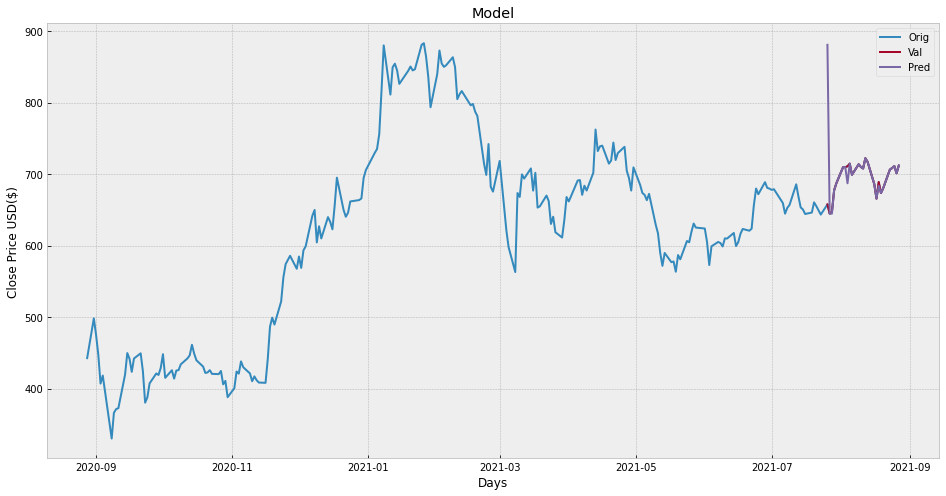

In [14]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid["Predictions"] =  predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


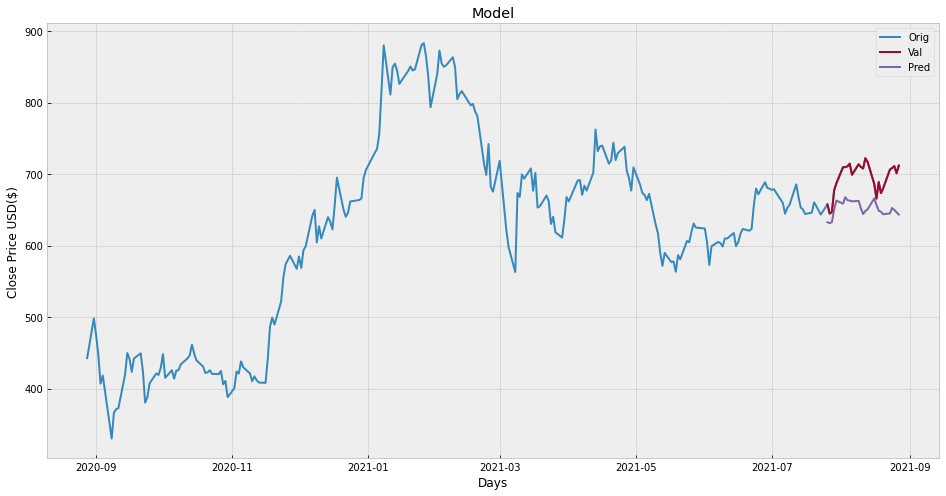

In [15]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid["Predictions"] =  predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()